In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



url = 'https://raw.githubusercontent.com/esnt/Data/refs/heads/main/CleanData/SMSSpamCollection'
df =  pd.read_csv(url, sep='\t', names=['target', 'message'])

y = (df['target']=='spam').astype(int)
X = df['message']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=100)
pattern = r'(?u)\b[^\W\d_]{2,}\b'
vec = CountVectorizer(binary=True, min_df=10, max_df=0.5, token_pattern=pattern)
Xtrain = vec.fit_transform(Xtrain)
Xtest = vec.transform(Xtest)
#pd.DataFrame(Xtrain.toarray(), columns=vec.get_feature_names_out()).head()

In [11]:
df.head(2)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [12]:
model = LogisticRegression(C=0.01)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [13]:
accuracy_score(ytest, ypred)

0.9174443646805456

In [14]:
1- ytest.mean()

0.8657573582196698

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [16]:
#import sklearn.metrics as skm 

In [17]:
confusion_matrix(ytest, ypred)

array([[1206,    0],
       [ 115,   72]])

In [18]:
recall_score(ytest, ypred)

0.3850267379679144

In [19]:
72/72

1.0

In [20]:
precision_score(ytest, ypred)

1.0

In [21]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1206
           1       1.00      0.39      0.56       187

    accuracy                           0.92      1393
   macro avg       0.96      0.69      0.76      1393
weighted avg       0.92      0.92      0.90      1393



In [25]:
yprob = model.predict_proba(Xtest)[:,1]

In [26]:
yprob

array([0.14899288, 0.05837224, 0.49861359, ..., 0.08966773, 0.52910947,
       0.08196629])

In [27]:
#print(roc_auc_score(ytest, ypred)) # this is wrong
print(roc_auc_score(ytest, yprob))

0.9819574143542535


In [28]:
fpr, tpr, thresholds = roc_curve(ytest, yprob)

In [33]:
len(thresholds)

140

In [34]:
print(fpr[90:100])
print(tpr[90:100])
print(thresholds[90:100])

[0.27114428 0.29767828 0.29933665 0.30348259 0.30348259 0.34245439
 0.34577114 0.3615257  0.36318408 0.45273632]
[0.98395722 0.98395722 0.98395722 0.98395722 0.98930481 0.98930481
 0.98930481 0.98930481 0.98930481 0.98930481]
[0.0928989  0.08865408 0.08854147 0.0877974  0.08764036 0.08296768
 0.08289607 0.08153436 0.08151888 0.07321551]


Text(0.5, 1.0, 'ROC curve')

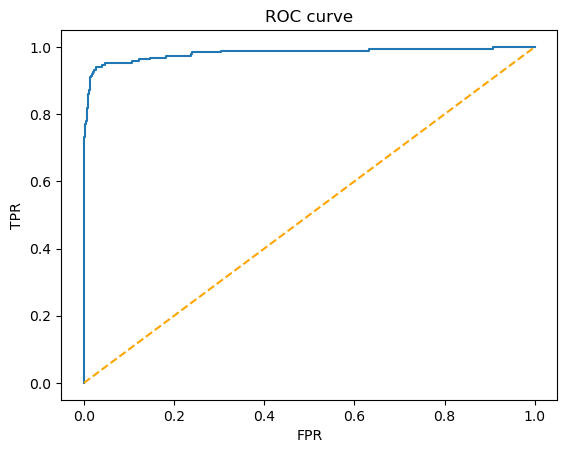

In [31]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.title('ROC curve');

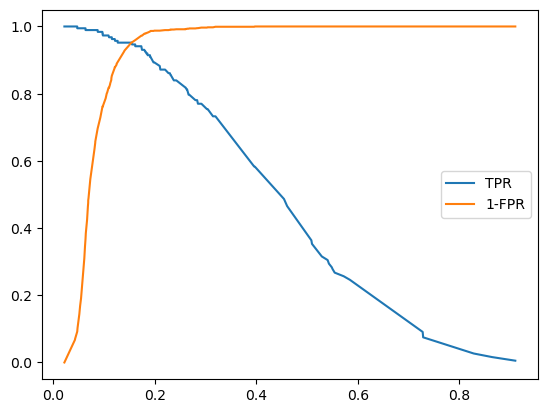

In [38]:
plt.plot(thresholds, tpr, label='TPR')
plt.plot(thresholds, 1-fpr, label='1-FPR')
plt.legend();

In [39]:
roc_auc_score(ytest, yprob)

0.9819574143542535

In [40]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9819574143542535

In [25]:
thresholds[50]

0.18557767888873128

In [26]:
fpr[50], tpr[50]

(0.01824212271973466, 0.9197860962566845)

In [27]:
recall_score(ytest, yprob>0.1855776)

0.9197860962566845

In [41]:
precision, recall, thresholds = precision_recall_curve(ytest, yprob)

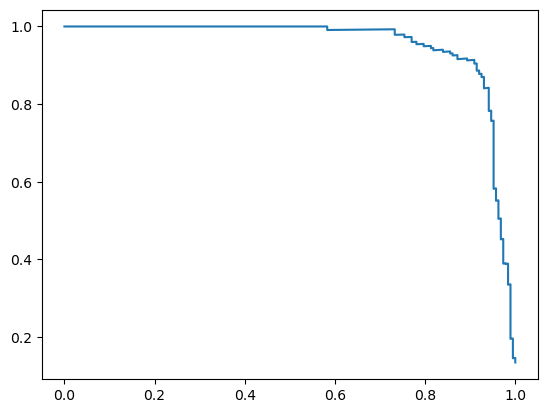

In [42]:
plt.plot(recall, precision)

In [43]:
auc(recall, precision)

0.9531607316305312

In [44]:
from sklearn.metrics import average_precision_score
average_precision_score(ytest, yprob)

0.953242957548188

In [45]:
fpr, tpr, thresholds = roc_curve(ytest, yprob)

# Find threshold to maximize Youden's J statistic (J=TPR-FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [46]:
optimal_threshold

0.17365761763312554

In [49]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1206
           1       1.00      0.39      0.56       187

    accuracy                           0.92      1393
   macro avg       0.96      0.69      0.76      1393
weighted avg       0.92      0.92      0.90      1393



In [50]:
print(classification_report(ytest, yprob>optimal_threshold))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1206
           1       0.84      0.94      0.89       187

    accuracy                           0.97      1393
   macro avg       0.92      0.95      0.93      1393
weighted avg       0.97      0.97      0.97      1393

